### Pavel Makarov
### Breast cancer detection using machine learning algorithms

In [2]:
# Import libraries
# Data preparation and manipulations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Feature selection and preprocessing and ML models assesment
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,roc_curve, auc
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Grid Search and pipelining
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Model saving
from joblib import dump, load


In [3]:
# Load the dataset
df = pd.read_csv('data.csv')

In [4]:
# Print first 5 rows 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Print out information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Calculate quick stats for the features
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### NOTE: The data framne has no missing values

In [6]:
# Drop irrelevant columns
df = df.drop(columns = ['id','Unnamed: 32'])

In [7]:
# Set a key value dictionary to re-code target value
keys = {'M':1,
    'B':0}

In [10]:
# Recode target values to 0 and 1
df = df.replace(to_replace= keys)

In [11]:
# Check the results
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Verify NaN values in the finalized data frame
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## EDA

In [13]:
# Crerate a copy of the data frame for EDA
df_copy = df.copy()

In [14]:
# Reverse keys for the visualization generations
keys_reverse = {1:'Malignant',
    0: 'Binagn'}

In [15]:
# Recode to the texzt version of the target value
df_copy = df_copy.replace(to_replace= keys_reverse)

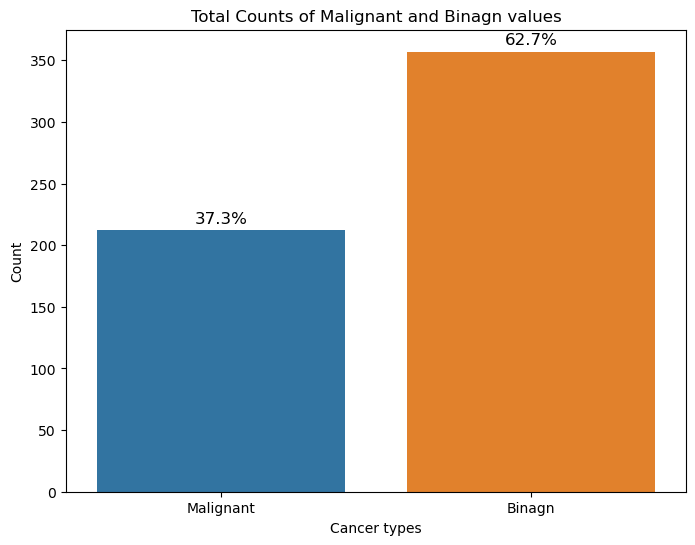

In [16]:
# Plot the target value balances
plt.figure(figsize = (8,6))
ax = sns.countplot(x=df_copy['diagnosis'], data=df_copy)


# Customize the plot
plt.title('Total Counts of Malignant and Binagn values')
plt.xlabel('Cancer types')
plt.ylabel('Count')

# Calculate percentages
total = len(df_copy)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Display the plot
plt.show()

### Distributions of the numeric features

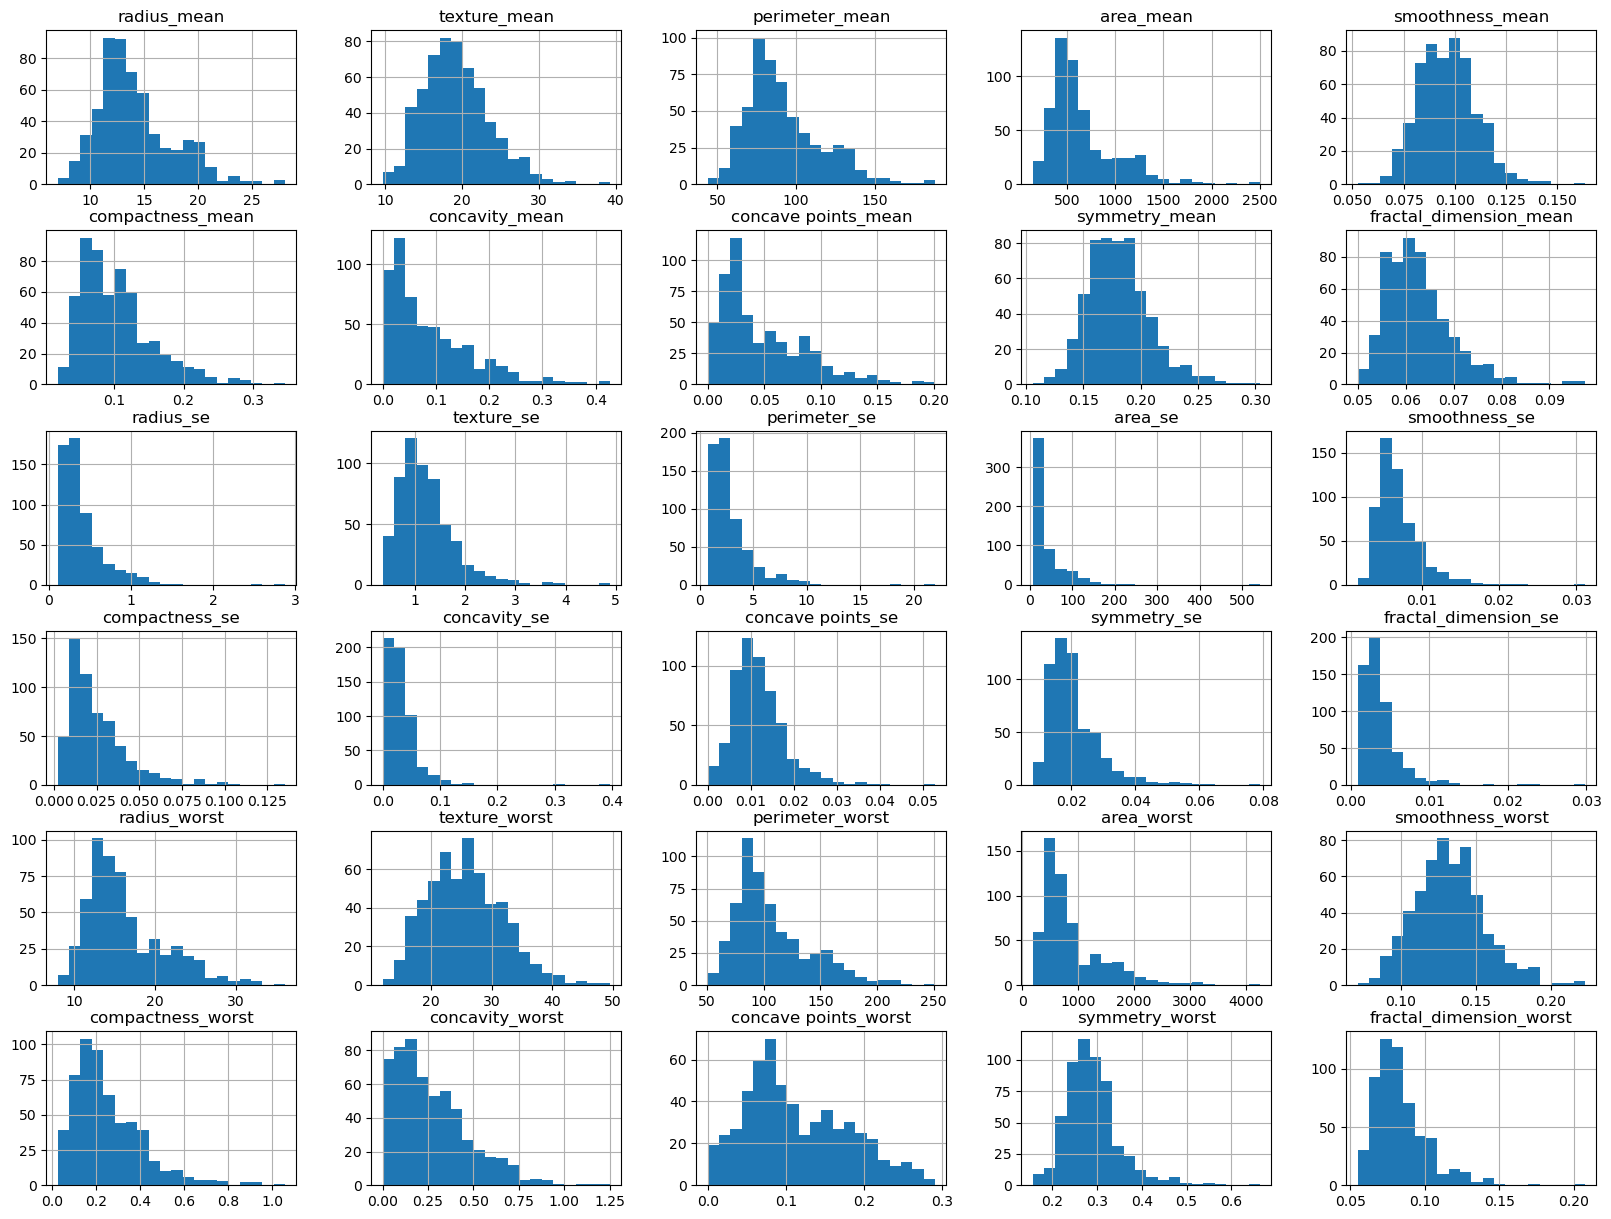

In [17]:
# Build histograms for all numeric features
columns_to_plot = df.columns[~df.columns.isin(['diagnosis'])]
df[columns_to_plot].hist(bins=20, figsize=(20, 15))
plt.show()

#### NOTE: There no significant outlier detected in the numeric features and most of the features are normally distributed

### Correlation

In [18]:
# Create a correlation matrix  instance
corr_matrix = df.corr()

In [19]:
# Correlate all features with the target value
corr_with_target = corr_matrix['diagnosis'].sort_values(ascending=False)
corr_df = corr_with_target.to_frame().reset_index()
corr_df.columns = ['Feature', 'Correlation']

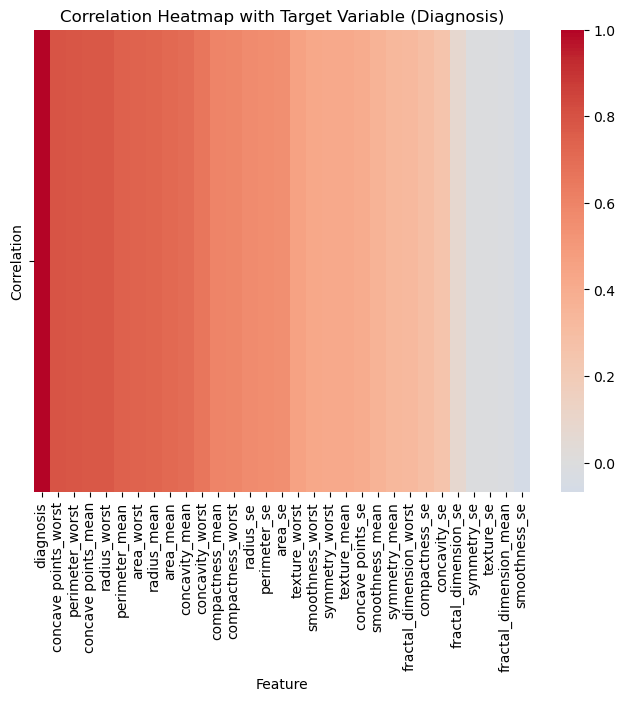

In [20]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.set_index('Feature').T, cmap='coolwarm', center=0)

# Customize the plot
plt.title('Correlation Heatmap with Target Variable (Diagnosis)')
plt.show()

#### NOTE: Correlation heatmapo demostrated strong correlation of target with most of the features except fractial dimensions, symmetry, texture, fractal dimension, smoothness. 

## Feature selection

In [21]:
# Assign features variable
X = df.drop(columns = 'diagnosis')

In [22]:
# Assign target variable 
y = df['diagnosis']

In [23]:
# Perform a train/test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

## RFE

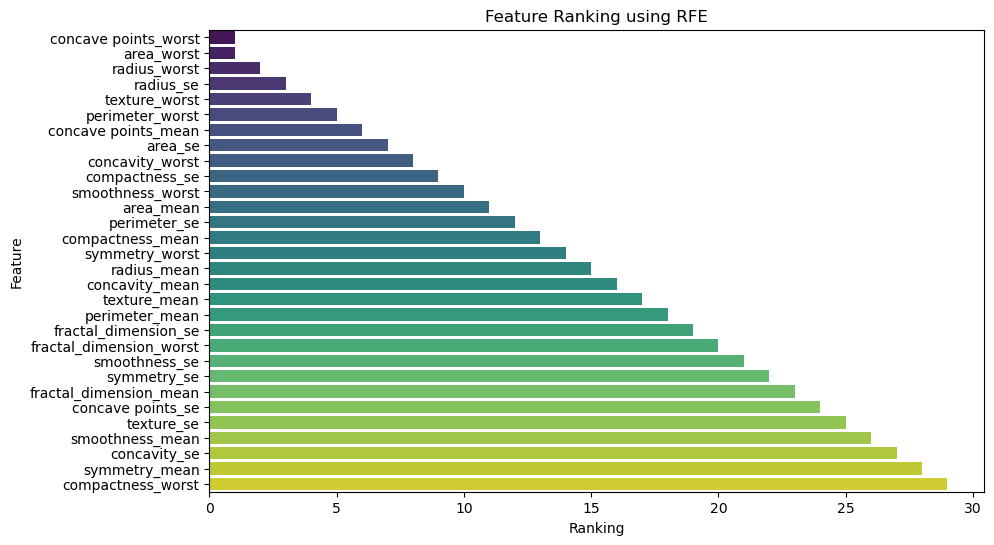

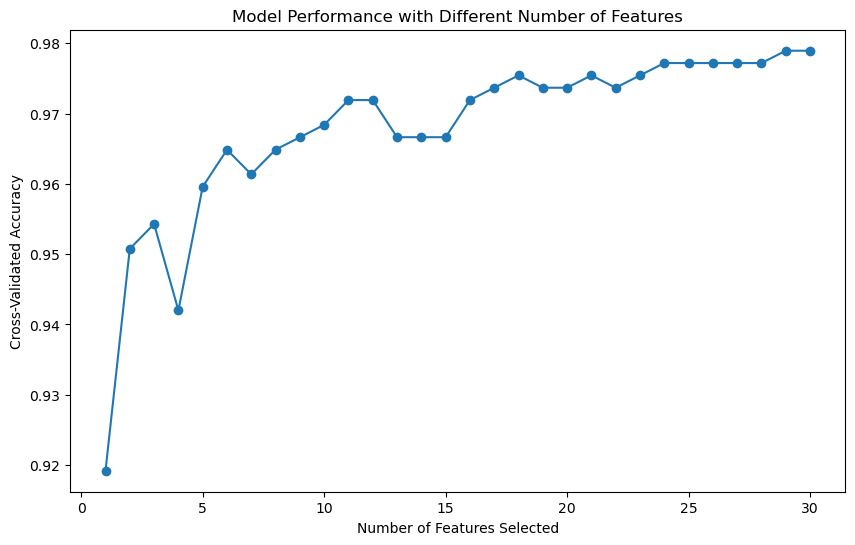

In [24]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Initialize RFE with the model and the desired number of features to select
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X_scaled, y)

# Get the ranking of the features
ranking = rfe.ranking_

# Create a DataFrame for visualization
ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})

# Sort the DataFrame by ranking
ranking_df = ranking_df.sort_values(by='Ranking')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=ranking_df, palette='viridis')

# Customize the plot
plt.title('Feature Ranking using RFE')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()

# Record the mean cross-validation score for each number of features
scores = []
for n in range(1, len(X.columns) + 1):
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_scaled, y)
    score = cross_val_score(rfe, X_scaled, y, cv=5).mean()
    scores.append(score)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns) + 1), scores, marker='o')
plt.title('Model Performance with Different Number of Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### NOTE: based on the model performance based on features number it is evident that all feautures have significant effect on the predicting accuracy. RFE algorithm results do not conform with the correlation matrix results. In this case for training a logistic regression model all features will be selected and results from RFE are trusted more since it used a logistic regression model with respect to the diagnosis target variable. The graph above shows that all features can be included into the training process.

## Logistic Regression Model Training

In [25]:
# Generate an instance of the Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_train, y_train)

# Evaluate the performance on the testing set
y_pred_lr = lr.predict(X_test)

In [26]:
# Print the results
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

<AxesSubplot:>

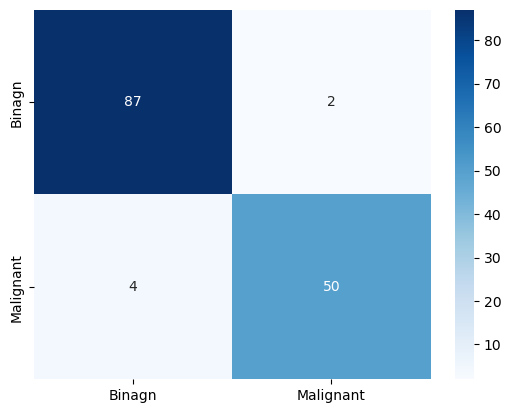

In [28]:
# Generate a confusion matrix visulaization
categories = ['Binagn', 'Malignant']
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')


### Random Forest Model Training with a GridSearch CV

In [29]:
# Transform the features using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Perform a train test split for scaled features and target variable (75/25)
X_train, X_test, y_train, y_test = train_test_split(X ,y,test_size = 0.25, random_state = 42)

In [31]:
# Create a simple Rnadom Forest model and calculate metrics
rfm = RandomForestClassifier(random_state=42)
model_rf = rfm.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [32]:
# Determine the parameters for fine tuning
search_grid = {
    'n_estimators': [10,  100,  300,  1000],
    'max_depth': [None, 10,  30,  50, ],
    'min_samples_split': [2,  10,  30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10,  30,  50],
    'min_impurity_decrease': [0.0,  0.05],
    'bootstrap': [True, False]
 
}

In [33]:
# Generate an instance of a Random Forest Classifier
rfm = RandomForestClassifier(random_state=42)

In [34]:
# Create a grid search parameters 
grid_search = GridSearchCV(estimator = rfm, param_grid = search_grid, cv =5, n_jobs = -1, scoring = 'accuracy', verbose = 2)

In [35]:
# Train a model using grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 30, 50],
                         'min_impurity_decrease': [0.0, 0.05],
                         'min_samples_split': [2, 10, 30],
                         'n_estimators': [10, 100, 300, 1000]},
             scoring='accuracy', verbose=2)

In [36]:
# Exctract the best model parameters from the grid search and assign that model to a variable
best_grid_model_rf = grid_search.best_estimator_

In [37]:
# Generate predictions using best estimator model
y_predict_rfm = best_grid_model_rf.predict(X_test)

In [38]:
print(classification_report(y_test, y_predict_rfm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict_rfm)

<AxesSubplot:>

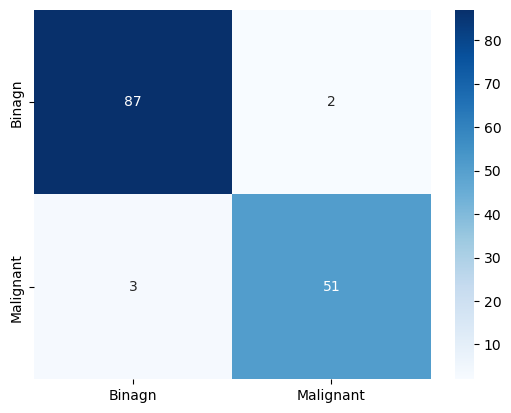

In [40]:
# Generate a confusion matrix visulaization
categories = ['Binagn', 'Malignant']
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')

#### NOTE: No improvement from the GridSearchCV

In [56]:
# Save the model
dump(best_grid_model_rf , 'trained_random_forest_breast_c.joblib')

['trained_random_forest_breast_c.joblib']

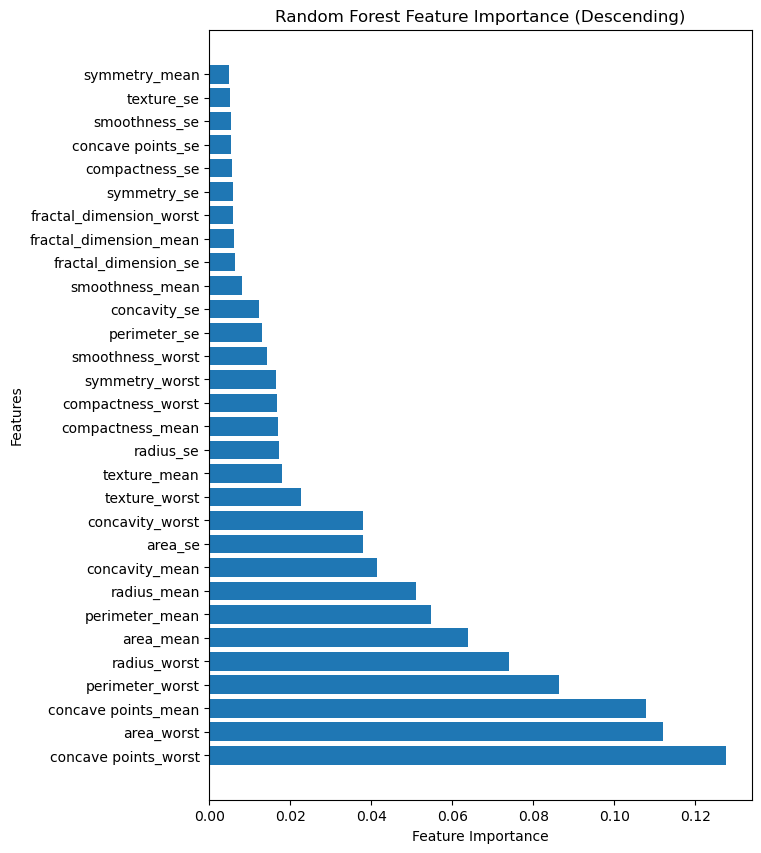

In [57]:
# Generate bar chart for feature importance
feature_importance = best_grid_model_rf.feature_importances_

# Sort feature importance and feature names
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = np.array(X_train.columns)[sorted_indices]
sorted_importance = feature_importance[sorted_indices]


plt.figure(figsize=(7, 10))
plt.barh(sorted_features, sorted_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance (Descending)')
plt.show()

#### NOTE: The performance of the random forest model is worse than logistic regression model.

## XGBoost

In [59]:
# Call an instance of XGBoost classifier with next parmaters
xgb_clf = XGBClassifier(
    objective='binary:logistic',  
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    tree_method='hist',
    device = 'cuda',
    random_state=42
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)



In [63]:
# Print the metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### Hyperparameter Tuning foer XGBoost Classifier

In [64]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

In [65]:
# Initializae a XGBoost classifier model
xgb_clf = XGBClassifier(
    objective='binary:logistic',  
    tree_method='hist',
    device = 'cuda',
    random_state=42
)


In [66]:
# Set up the RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=50,  
    scoring='accuracy',
    n_jobs=-1,
    cv=3,  
    verbose=1,
    random_state=42
)

In [67]:
# Initiate a search
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cuda',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_ra...
                                           monotone_constraints=None,
                                           multi_strategy=None,
    

In [70]:
# Best hyperparameters
print("Best hyperparameters:", randomized_search.best_params_)

# Best model
best_model = randomized_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)



Best hyperparameters: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.6}


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [72]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

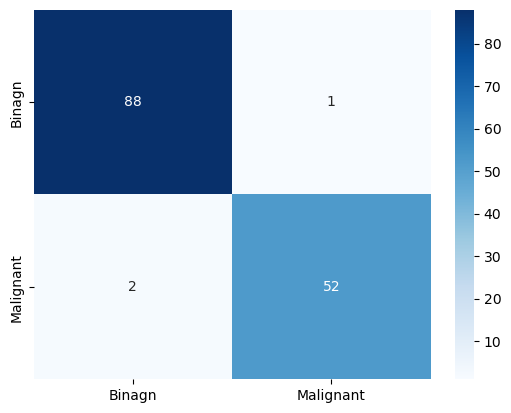

In [73]:
# Generate a confusion matrix visulaization
categories = ['Binagn', 'Malignant']
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')


#### ROC

In [74]:
# Prediction on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [75]:
# calculate false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [76]:
# Calculate AUC
roc_auc = auc(fpr, tpr)

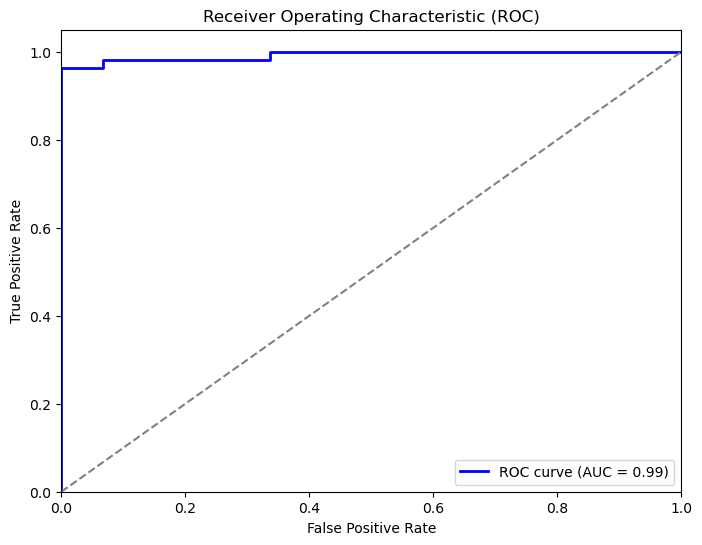

In [77]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [78]:
# Save the model
dump(best_model , 'trained_xgboost_breast_cancer_c.joblib')

['trained_xgboost_breast_cancer_c.joblib']